In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/attendance-622022/garag_kids_in.csv
/kaggle/input/attendance-622022/Personnel File2-2022.csv
/kaggle/input/attendance-622022/galaa_out1.csv
/kaggle/input/attendance-622022/galaa_in2.csv
/kaggle/input/attendance-622022/galaa_out2.csv
/kaggle/input/attendance-622022/garag_kids_out.csv
/kaggle/input/attendance-622022/galaa_in1.csv
/kaggle/input/attendance-622022/kids_in.csv
/kaggle/input/attendance-622022/kela2.csv
/kaggle/input/attendance-622022/kela.csv
/kaggle/input/attendance-622022/shoon.csv


In [2]:
#list of machine name
list_of_machine_names=['galaa_in1','galaa_in2','galaa_out1','galaa_out2','garag_kids_in','garag_kids_out','kela','kela2','kids_in','shoon']

 
#read files and make DataFrame       
for machine in list_of_machine_names:
    globals()[machine]=pd.read_csv('../input/attendance-622022/{}.csv'.format(machine))
    
#what columns i need
filter_col=['WorkId','Date','Time']

#clean my data and increase "Machine" column
for new_df in list_of_machine_names:
    globals()[new_df]=globals()[new_df][filter_col]
    globals()[new_df]['Machine']=new_df
    
    
#combine all files
combined_files = pd.concat([globals()[f] for f in list_of_machine_names ])

#put data in "combined" file
combined_files.to_csv( "combined.csv", index=False, encoding='utf-8-sig')

#convert date from string to date time
combined_files['Date']=pd.to_datetime(combined_files['Date'])

#print last day in this attendane
combined_files.nlargest(1,'Date')

,WorkId,Date,Time,Machine
4976,31660,2022-02-06,00:00:05,galaa_out1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


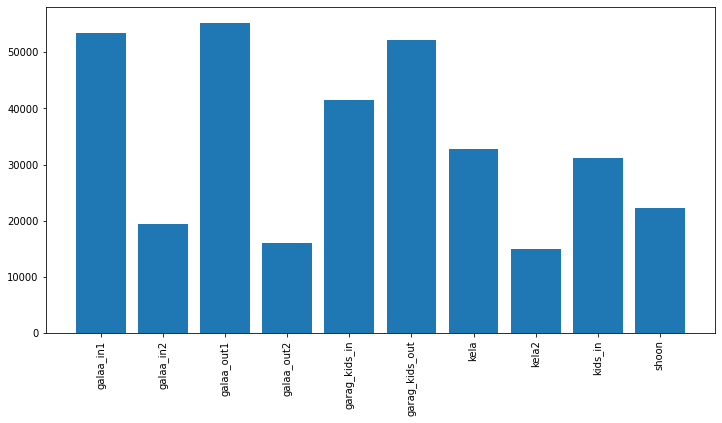

In [3]:
groubed =combined_files.groupby('Machine').agg({'Time':'count'})

fig ,ax =plt.subplots()
plt.style.use('ggplot')
fig.set_size_inches([12,6])
ax.bar(groubed.index,groubed['Time'])
ax.set_xticklabels(groubed.index , rotation=90)
plt.show()

In [4]:
personal_file =pd.read_csv('../input/attendance-622022/Personnel File2-2022.csv' , encoding ='windows-1256')
personal_file=personal_file.rename(columns={'*Person ID':'Id'})
personal_file=personal_file.rename(columns={'*Organization':'Organization'})
personal_file=personal_file.rename(columns={'*Person Name':'Name'})

combined_files=combined_files.rename(columns={'WorkId':'Id'})

merged_files = personal_file.merge(combined_files,on='Id')
merged_files.to_csv('all_6-2-2022.csv')



,Id,Organization,Name,Date,Time,Machine
349,9,'الجلاء,احمد سلامة محمد رمضان,2022-01-30,14:53:24,galaa_in1
350,9,'الجلاء,احمد سلامة محمد رمضان,2022-02-01,10:38:09,galaa_in1
351,9,'الجلاء,احمد سلامة محمد رمضان,2022-02-05,08:30:47,galaa_in1
352,9,'الجلاء,احمد سلامة محمد رمضان,2022-02-05,21:09:13,galaa_in1
353,9,'الجلاء,احمد سلامة محمد رمضان,2022-02-05,21:09:16,galaa_in1
...,...,...,...,...,...,...
581,9,'الجلاء,احمد سلامة محمد رمضان,2022-01-24,16:37:33,shoon
582,9,'الجلاء,احمد سلامة محمد رمضان,2022-01-25,17:22:18,shoon
583,9,'الجلاء,احمد سلامة محمد رمضان,2022-01-25,17:22:21,shoon
584,9,'الجلاء,احمد سلامة محمد رمضان,2022-01-26,14:10:09,shoon


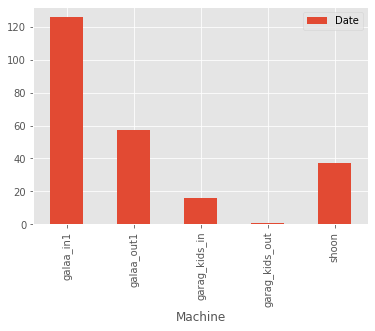

In [5]:
ahmed_salama=merged_files[merged_files['Id']==9]
gg =ahmed_salama.groupby('Machine').agg({'Date':'count'})
gg.plot(kind='bar')
ahmed_salama